<a href="https://colab.research.google.com/github/grojasc/MIA/blob/main/Tarea_1_IMT3850__GR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demuestre la siguiente identidad de acuerdo a las definiciones vistas en la clase 1,

rms(x)
2 = avg(x)
2 + std(x)
2


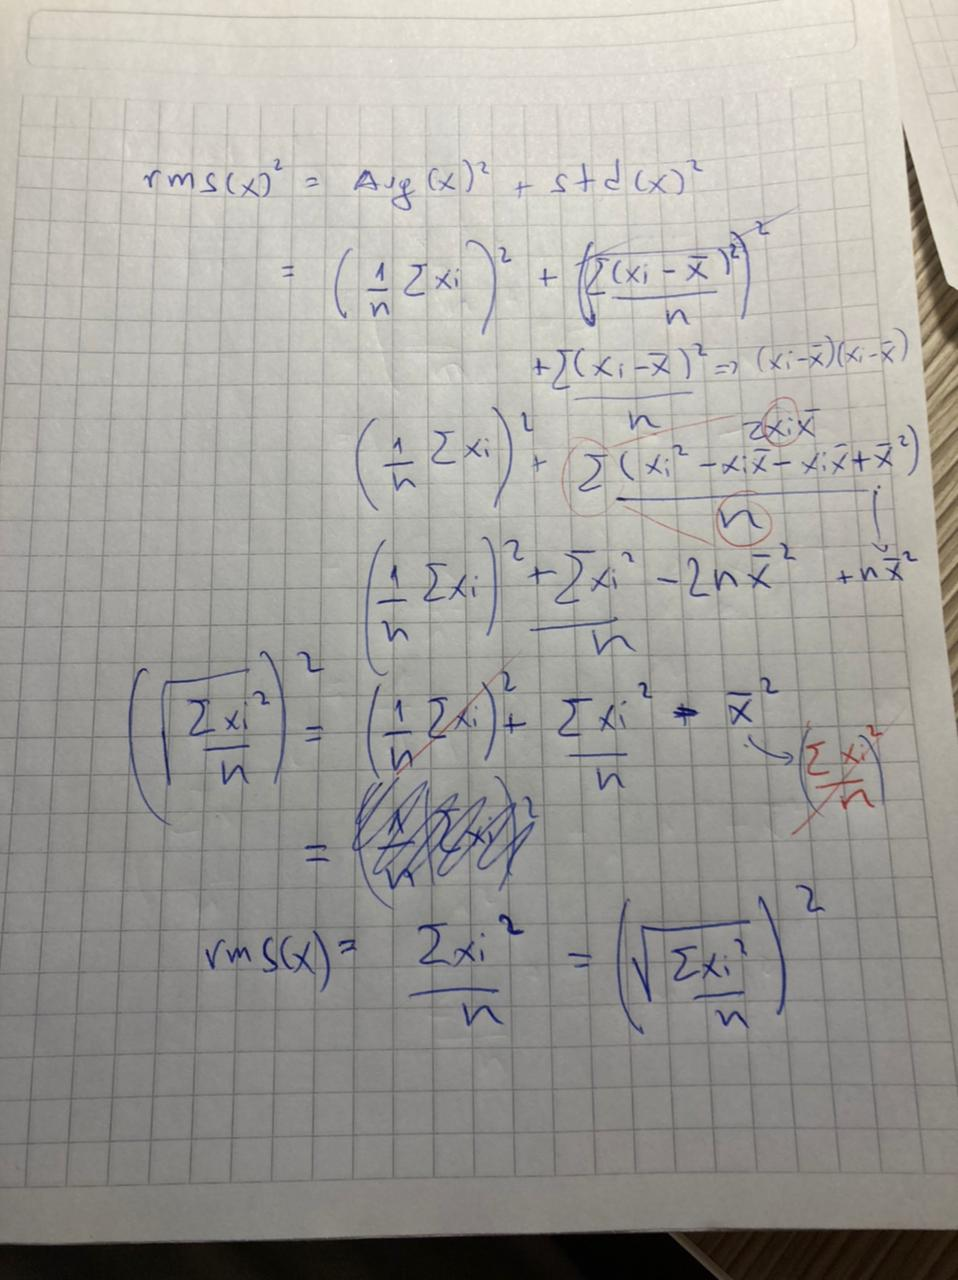

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
import pandas as pd
from numpy import genfromtxt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MIA 2022/Fundamentos Matemáticos para IA/datakmeans (1).csv')


In [ ]:
X = genfromtxt('/content/drive/MyDrive/MIA 2022/Fundamentos Matemáticos para IA/datakmeans (1).csv', delimiter=',')
print(data)


             0         1
0    -4.272404 -9.667048
1    -1.848082 -4.687662
2     8.816753  0.101368
3     6.743281 -2.990887
4    -4.751872 -7.044639
...        ...       ...
1995 -7.098423 -8.231545
1996 -3.565410 -7.072834
1997  7.355605  9.673196
1998  5.043384  3.636075
1999  1.440339 -3.512206

[2000 rows x 2 columns]


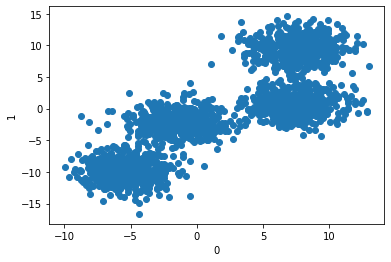

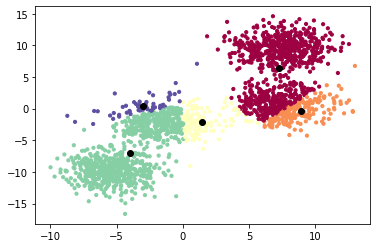

array([2., 3., 3., ..., 0., 0., 2.])

In [ ]:
# número de cluster inicial:
k = 5
# Número de iteraciones:
NITERMAX = 100
# número de datos y data inicial:
X = genfromtxt('/content/drive/MyDrive/MIA 2022/Fundamentos Matemáticos para IA/datakmeans (1).csv', delimiter=',')
num_datos = X.shape[0]
num_features = X.shape[1]

# Visualizar datos iniciales
def plot_scatter_data(data):
  plt.scatter(data[:,0],data[:,1])
  plt.xlabel('0')
  plt.ylabel('1')
  plt.show()
plot_scatter_data(X)

# Definir Z0 como centroides iniciales:

def iniciar_centroides(k,num_features,X):
  Z0 = np.zeros((k,num_features))
  for k in range(k):
    centroide = X[np.random.choice(range(num_datos))]
    Z0[k] = centroide
  return Z0
Z0 = iniciar_centroides(k,num_features,X)


#Crear Clusters

def crear_clusters(X,Z0):
  clusters = [[] for _ in range(k)]
  for point_idx, point in enumerate(X):
    closest_centroide = np.argmin(np.sqrt(np.sum((point - Z0) ** 2, axis=1)))
    clusters[closest_centroide].append(point_idx)
  return clusters

clusters = crear_clusters(X,Z0)

# Calcular nuevos centroides

def calcular_nuevos_centroids( clusters, X):
  Z0 = np.zeros((k, num_features))
  for idx, cluster in enumerate(clusters):
    new_centroide = np.mean(X[cluster], axis=0)
    Z0[idx] = new_centroide
  return Z0

Z0 = calcular_nuevos_centroids(clusters,X)

# Predecir los clusters:
def predecir_cluster(clusters, X):
  y_pred = np.zeros(num_datos)
  for cluster_idx, cluster in enumerate(clusters):
    for sample_idx in cluster:
      y_pred[sample_idx] = cluster_idx
  return y_pred

y = predecir_cluster(clusters, X)

# Ploter nueva salida de datos:
def plot_figura(X, y, Z0):
  plt.scatter(X[:, 0], X[:, 1], c=y,marker='.', s=40, cmap=plt.cm.Spectral)
  plt.scatter(Z0[:,0],Z0[:,1],color='black',marker='o',label='centroid')
  plt.show()

#plot_figura(X,y)

# correr modelo

def k_means_fit(X):
  Z0 = iniciar_centroides(k,num_features,X)
  for it in range(NITERMAX):
    clusters = crear_clusters(X,Z0)
    previous_centroids = Z0
    Z0 = calcular_nuevos_centroids(clusters, X)
    diff = Z0 - previous_centroids
    if not diff.any():
      print("Terminar criterio ok")
    break
  y_pred = predecir_cluster(clusters, X)
  if plot_figura:
    plot_figura(X, y_pred,Z0)
  return y_pred
k_means_fit(X)




In [ ]:
import sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
data = mnist.data
target = mnist.target
print(mnist.data.shape)

data1 = data.to_numpy()
target1 = target.to_numpy()



KeyboardInterrupt: ignored

In [ ]:
print(type(data1))
X = data1
###X = 255-data  #genfromtxt('/content/drive/MyDrive/MIA 2022/Fundamentos Matemáticos para IA/datakmeans (1).csv', delimiter=',')
num_datos, num_features = X.shape



<class 'numpy.ndarray'>


TypeError: ignored

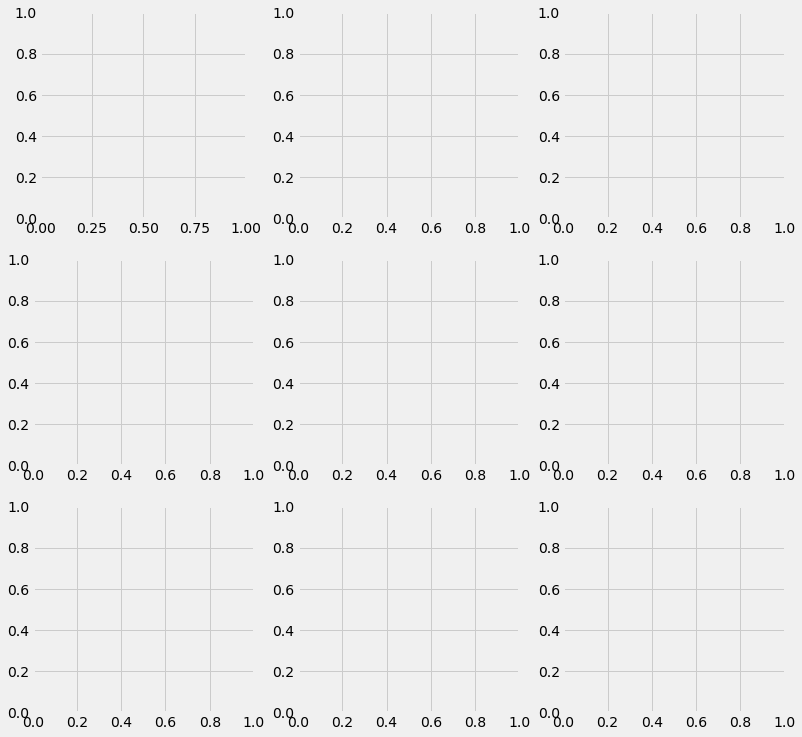

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.imshow(data1[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(target1[i]))
    
# display the figure
plt.show()

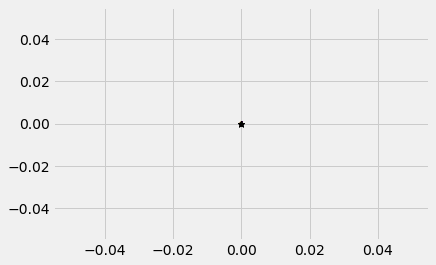

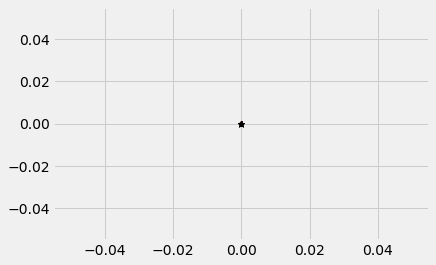

In [ ]:

# número de cluster inicial:
k = 20
# Número de iteraciones:
NITERMAX = 100
# número de datos y data inicial:
###data = digits.data
X = data1
#X = 255-data1  #genfromtxt('/content/drive/MyDrive/MIA 2022/Fundamentos Matemáticos para IA/datakmeans (1).csv', delimiter=',')
num_datos, num_features = X.shape

# Visualizar datos iniciales
#def plot_scatter_data(data):
#  plt.scatter(data[:,0],data[:,1])
#  plt.xlabel('0')
#  plt.ylabel('1')
#  plt.show()
#plot_scatter_data(X)

# Definir Z0 como centroides iniciales:

def iniciar_centroides(k,num_features,X):
  Z0 = np.zeros((k,num_features))
  for k in range(k):
    centroide = X[np.random.choice(range(num_datos))]
    Z0[k] = centroide
  return Z0
Z0 = iniciar_centroides(k,num_features,X)


#Crear Clusters

def crear_clusters(X,Z0):
  clusters = [[] for _ in range(k)]
  for point_idx, point in enumerate(X):
    closest_centroide = np.argmin(np.sqrt(np.sum((point - Z0) ** 2, axis=1)))
    clusters[closest_centroide].append(point_idx)
  return clusters

clusters = crear_clusters(X,Z0)

# Calcular nuevos centroides

def calcular_nuevos_centroids( clusters, X):
  Z0 = np.zeros((k, num_features))
  for idx, cluster in enumerate(clusters):
    new_centroide = np.mean(X[cluster], axis=0)
    Z0[idx] = new_centroide
  return Z0

Z0 = calcular_nuevos_centroids(clusters,X)

# Predecir los clusters:
def predecir_cluster(clusters, X):
  y_pred = np.zeros(num_datos)
  for cluster_idx, cluster in enumerate(clusters):
    for sample_idx in cluster:
      y_pred[sample_idx] = cluster_idx
  return y_pred

y = predecir_cluster(clusters, X)

# Ploter nueva salida de datos:--> NO Sirve para mnist
def plot_figura(X, y, Z0):
  plt.scatter(X[:, 0], X[:, 1], c=y,marker='.', s=40, cmap=plt.cm.Spectral)
  plt.scatter(Z0[:,0],Z0[:,1],color='black',marker='*',label='centroid')
  plt.show()

#plot_figura(X,y)

# correr modelo

def k_means_fit(X):
  Z0 = iniciar_centroides(k,num_features,X)
  for it in range(NITERMAX):
    clusters = crear_clusters(X,Z0)
    previous_centroids = Z0
    Z0 = calcular_nuevos_centroids(clusters, X)
    diff = Z0 - previous_centroids
    if not diff.any():
      print("Terminar criterio ok")
    break
  y_pred = predecir_cluster(clusters, X)
  if plot_figura:
    plot_figura(X, y_pred,Z0)
  return y_pred
k_means_fit(X)
Z = k_means_fit(X)



In [ ]:
Z
k = 20
fila = np.where(Z==1)[0] # filas en Z donde están las imagenes de cada cluster
num = fila.shape[0]      # numero imagenes de cada cluster
r = np.floor(num/10.) 
print(r+1,20,k+1)
#filas,columnas, marca 

517.0 20 21


cluster 0
4334 elementos


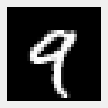

cluster 1
5163 elementos


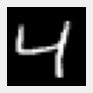

cluster 2
1255 elementos


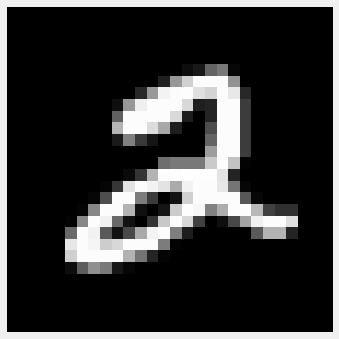

cluster 3
1504 elementos


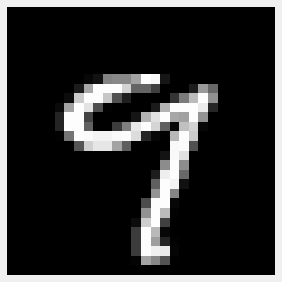

cluster 4
4414 elementos


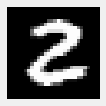

cluster 5
5016 elementos


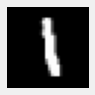

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:

k = 20
for i in range(0,k):

  fila = np.where(Z==i)[0] # filas en Z donde están las imagenes de cada cluster
  num = fila.shape[0]      # numero imagenes de cada cluster
  r = np.floor(num/30.)    # numero de filas menos 1 en figura de salida 

  print("cluster "+str(i))
  print(str(num)+" elementos")

  plt.figure(figsize=(280,280))
  for k in range(0, 200):
    plt.subplot(r+1, 20, k+1)
    imagen = data1[fila[k],:]
    imagen = imagen.reshape(28, 28)
    plt.imshow(imagen, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
sse = []
k_rng = range(1,20)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

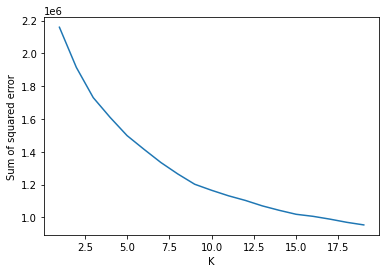

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

#3.  Independencia lineal
Considere una matriz de A ∈ R
m×n con m > n y un vector b ∈ R
m. Buscamos el vector solución x ∈ R
n
del sistema lineal Ax = b. Describa como puede asegurar de forma práctica si la solución del sistema
existe o no.

Para asegurar que la solución existe, se puede tratar resolver el sistema lineal utilizando algún método (reducción, sustitución, etc).
Al existir más ecuaciones que incógnitas , se deben descartar p ecuaciones tales que m-p=n y proceder a resolver el sistema reducido.
Y al obtener las soluciones de este sistema se deben reemplazar en las p ecuaciones descartadas, dónde pueden ocurrir los siguientes eventos:

**1- m=n o cuadrado, las ecuaciones y variables son iguales, Se satisfacen las p ecuaciones lo que implica que la solución existe y es única.**

**2-m<n subdeterminado, hay mas variables que ecuaciones**

**3-m>n sobredeterminado, existen mas ecuaciones que variables, Al menos 1 de las p ecuaciones no se satisface lo que implicaría que la solución no existe**

#4. Perceptron
Programe el algoritmo del Perceptrón. Puede ser útil construir en este caso una rutina

**Perceptron_fit(X, y, nitmax, eta)**

que tome los datos X, sus etiquetas y, y que retorne los pesos w del clasifcador. Otros hiperparámetros a considerar son nitmax y eta que corresponden respectivamente al número máximo de
iteraciones del algoritmo y el learning rate.

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

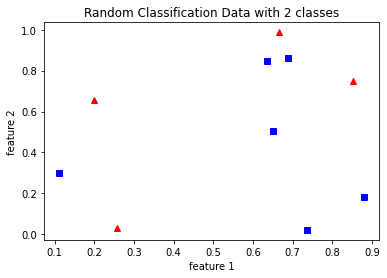

In [ ]:
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap
from matplotlib import rcParams
import numpy as np
from matplotlib import style
import pandas as pd
from numpy import genfromtxt
from sklearn.model_selection import train_test_split

rcParams["figure.figsize"] = 10,5
%matplotlib inline

data1 = genfromtxt('/content/drive/MyDrive/MIA 2022/Fundamentos Matemáticos para IA/data1.csv', delimiter=',')
data2 = genfromtxt('/content/drive/MyDrive/MIA 2022/Fundamentos Matemáticos para IA/data2.csv', delimiter=',')
#data_1 = pd.read_csv('/content/drive/MyDrive/MIA 2022/Fundamentos Matemáticos para IA/data1.csv')
#data_2 = pd.read_csv('/content/drive/MyDrive/MIA 2022/Fundamentos Matemáticos para IA/data2.csv')

np.random.seed(18)
new_data = np.random.random(size = (10, 2))
new_data_labels = np.random.randint(2, size = 10)

X3 = new_data
y3= new_data_labels
X = data1[1:,1:3]
X2 = data2[1:,1:3]
y = data1[1:,3]
y2 = data2[1:,3]
m, n = X.shape
#print(np.zeros(1 + X1.shape[1]))
#print(X,X.shape)

plt.plot(X3[:, 0][y3 == 0], X3[:, 1][y3 == 0], 'r^')
plt.plot(X3[:, 0][y3 == 1], X3[:, 1][y3 == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

Perceptron score 0.9


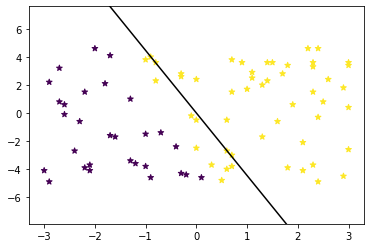

In [ ]:
# Perceptron data1:

X = data1[1:,1:3]
y = data1[1:,3]



nitmax = 1000
eta = 0.01


def Perceptron_fit(X,y):
  n_samples, n_features = X.shape
  #iniciar w:
  weights = np.zeros(n_features)
  bias = 0
  y_ = np.array([1 if  i > 0 else 0 for i in y])
  for _ in range(nitmax):
    for idx, x_i in enumerate(X):
      linear_output = np.dot(x_i,weights) + bias
      y_predicted = _unit_step_func(linear_output)
      update = eta * (y_[idx] - y_predicted)
      weights += update * x_i
      bias += update

def predict_(X):
  linear_output = np.dot(X,weights) + bias
  y_predicted = _unit_step_func(linear_output)
  return y_predicted

def _unit_step_func_(x):
  return np.where(x >= 0, 1, 0)


def accuracy_(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Perceptron_fit(X_train, y_train)
predictions = predict_(X_test)
print("Perceptron score", accuracy(y_test, predictions))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="*", c=y_train) #r^

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])


x1_1 = (-weights[0] * x0_1 - bias) / weights[1]
x1_2 = (-weights[0] * x0_2 - bias) / weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()




Perceptron score 0.6


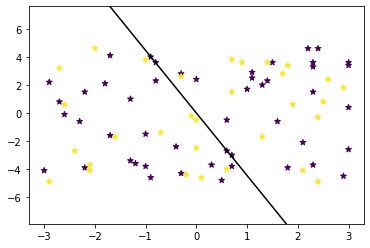

In [ ]:
#Perceptron data2:

X = data2[1:,1:3]
y = data2[1:,3]


nitmax = 1000
eta = 0.01


def Perceptron_fit(X,y):
  n_samples, n_features = X.shape
  #iniciar w:
  weights = np.zeros(n_features)
  bias = 0
  y_ = np.array([1 if  i > 0 else 0 for i in y])
  for _ in range(nitmax):
    for idx, x_i in enumerate(X):
      linear_output = np.dot(x_i,weights) + bias
      y_predicted = _unit_step_func(linear_output)
      update = eta * (y_[idx] - y_predicted)
      weights += update * x_i
      bias += update

def predict_(X):
  linear_output = np.dot(X,weights) + bias
  y_predicted = _unit_step_func(linear_output)
  return y_predicted

def _unit_step_func_(x):
  return np.where(x >= 0, 1, 0)


def accuracy_(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Perceptron_fit(X_train, y_train)
predictions = predict_(X_test)
print("Perceptron score", accuracy(y_test, predictions))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="*", c=y_train) #r^

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])


x1_1 = (-weights[0] * x0_1 - bias) / weights[1]
x1_2 = (-weights[0] * x0_2 - bias) / weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()



Perceptron score 0.6


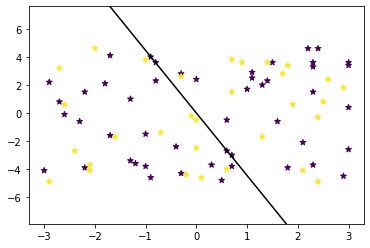

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

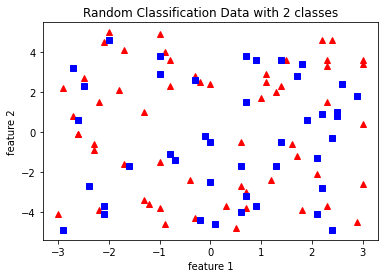

In [ ]:
#Perceptron new_data:
X3 = new_data
y3= new_data_labels



nitmax = 1000
eta = 0.01


def Perceptron_fit(X,y):
  n_samples, n_features = X.shape
  #iniciar w:
  weights = np.zeros(n_features)
  bias = 0
  y_ = np.array([1 if  i > 0 else 0 for i in y])
  for _ in range(nitmax):
    for idx, x_i in enumerate(X):
      linear_output = np.dot(x_i,weights) + bias
      y_predicted = _unit_step_func(linear_output)
      update = eta * (y_[idx] - y_predicted)
      weights += update * x_i
      bias += update

def predict_(X):
  linear_output = np.dot(X,weights) + bias
  y_predicted = _unit_step_func(linear_output)
  return y_predicted

def _unit_step_func_(x):
  return np.where(x >= 0, 1, 0)


def accuracy_(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Perceptron_fit(X_train, y_train)
predictions = predict_(X_test)
print("Perceptron score", accuracy(y_test, predictions))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="*", c=y_train) #r^

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])


x1_1 = (-weights[0] * x0_1 - bias) / weights[1]
x1_2 = (-weights[0] * x0_2 - bias) / weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()


plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')


al tratarse de un hiperplano que clasifica, el hecho de contar con valores demasiados mezclados no permite un buen score y además de no representar a cabalidar los clusters encotrados, esto resulta poco fiable.

# 5. Descomposición en valores singulares.


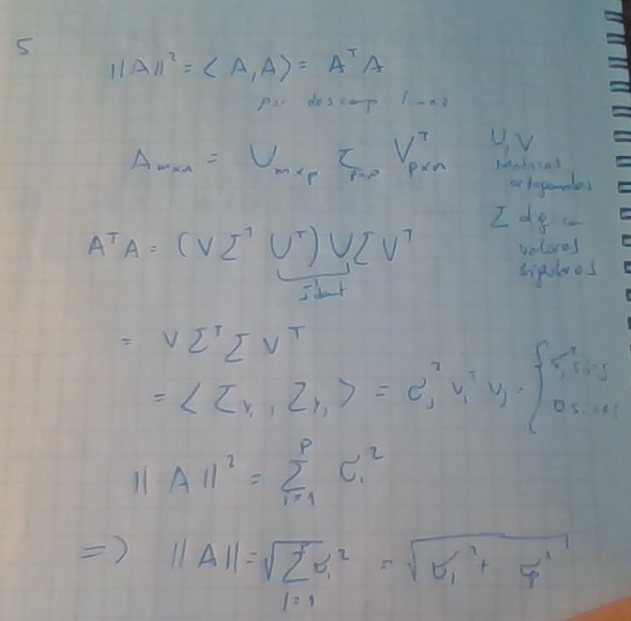

#6. Análisis de componentes principales (PCA).

In [ ]:
import sklearn
#from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
mnist = fetch_openml('mnist_784')
data = mnist.data
target = mnist.target
#data.drop('target', axis = 1, inplace = True) # borrar columna target
#np.delete(data, target, axis=None)
#X = 255-data 




In [ ]:
data.describe()
target.describe()

count     70000
unique       10
top           1
freq       7877
Name: class, dtype: object

In [ ]:

data1 = data.to_numpy()
target1 = target.to_numpy()
#with np.printoptions(threshold=np.inf):
#    print(data1)

Origina Digits without any noise


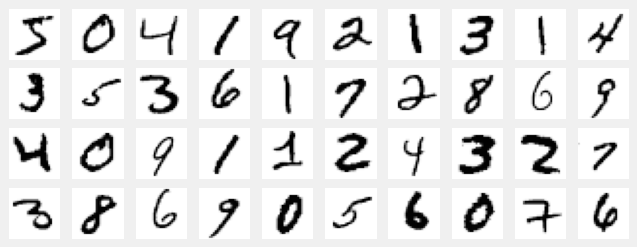

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='Greys')
print("Origina Digits without any noise")
plot_digits(X)

In [ ]:
import numpy as np


class PCA:
  def __init__(self, n_components):
    self.n_components = n_components
    self.components = None
    self.mean = None

  def fit(self, X):
    self.mean = np.mean(X, axis=0)
    X = X - self.mean
    cov = np.cov(X.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    eigenvectors = eigenvectors.T
    idxs = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]
    self.components = eigenvectors[0 : self.n_components]

  def transform(self, X):
    X = X - self.mean
    return np.dot(X, self.components.T)

X = data1
y = target1

pca = PCA(392)
pca.fit(X)

X_projected = pca.transform(X)
print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)



Shape of X: (70000, 784)
Shape of transformed X: (70000, 392)


In [ ]:
X_projected.dtype
#X_projected[10,:].reshape((8, 8))

dtype('complex128')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


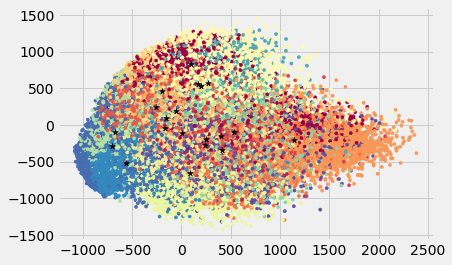

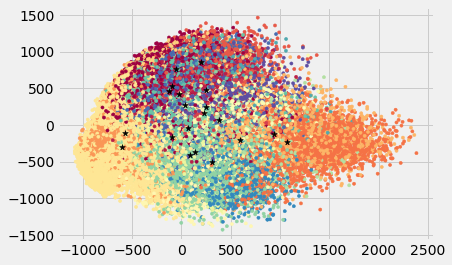

In [ ]:

# número de cluster inicial:
k = 20
# Número de iteraciones:
NITERMAX = 100
# número de datos y data inicial:
###data = digits.data
X = X_projected
#X = 255-data1  #genfromtxt('/content/drive/MyDrive/MIA 2022/Fundamentos Matemáticos para IA/datakmeans (1).csv', delimiter=',')
num_datos, num_features = X_projected.shape

# Visualizar datos iniciales
#def plot_scatter_data(data):
#  plt.scatter(data[:,0],data[:,1])
#  plt.xlabel('0')
#  plt.ylabel('1')
#  plt.show()
#plot_scatter_data(X)

# Definir Z0 como centroides iniciales:

def iniciar_centroides(k,num_features,X):
  Z0 = np.zeros((k,num_features))
  for k in range(k):
    centroide = X[np.random.choice(range(num_datos))]
    Z0[k] = centroide
  return Z0
Z0 = iniciar_centroides(k,num_features,X)


#Crear Clusters

def crear_clusters(X,Z0):
  clusters = [[] for _ in range(k)]
  for point_idx, point in enumerate(X):
    closest_centroide = np.argmin(np.sqrt(np.sum((point - Z0) ** 2, axis=1)))
    clusters[closest_centroide].append(point_idx)
  return clusters

clusters = crear_clusters(X,Z0)

# Calcular nuevos centroides

def calcular_nuevos_centroids( clusters, X):
  Z0 = np.zeros((k, num_features))
  for idx, cluster in enumerate(clusters):
    new_centroide = np.mean(X[cluster], axis=0)
    Z0[idx] = new_centroide
  return Z0

Z0 = calcular_nuevos_centroids(clusters,X)

# Predecir los clusters:
def predecir_cluster(clusters, X):
  y_pred = np.zeros(num_datos)
  for cluster_idx, cluster in enumerate(clusters):
    for sample_idx in cluster:
      y_pred[sample_idx] = cluster_idx
  return y_pred

y = predecir_cluster(clusters, X)


# correr modelo

def k_means_fit(X):
  Z0 = iniciar_centroides(k,num_features,X)
  for it in range(NITERMAX):
    clusters = crear_clusters(X,Z0)
    previous_centroids = Z0
    Z0 = calcular_nuevos_centroids(clusters, X)
    diff = Z0 - previous_centroids
    if not diff.any():
      print("Terminar criterio ok")
    break
  y_pred = predecir_cluster(clusters, X)
  if plot_figura:
    plot_figura(X, y_pred,Z0)
  return y_pred

k_means_fit(X)
Z = k_means_fit(X)
